In [ ]:
import cv2
from google.colab import files
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import io
import heapq
import math
import sys, random
from queue import PriorityQueue
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt


In [ ]:

o1=[(10,30),(20,30),(20,34),(10,34)]
o2=[(10,17),(20,17),(20,22),(10,22)]

l1,l2,l3,l4,l5,l6=10,10,10,10,10,10
source=((0,25,0))
goal=(25,25)
sample=[]
adj=[ [] * 1 for _ in range(1000000) ]
parent=[ -1 * 1 for _ in range(100000000)]
sample.append((source[0],source[1],source[2],0))


4983


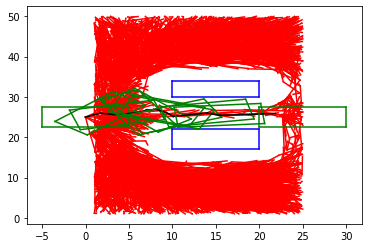

In [ ]:

def direction(a,b,c):
  mod=(b[1]-a[1])*(c[0]-b[0])-(b[0]-a[0])*(c[1]-b[1])
  if mod==0:
    return 0
  elif mod<0:
    return 1
  else:
    return 2

def online(a,b,c):
  if (c[0]<= max(a[0],b[0]) and c[0]>=min(a[0],b[0])) and (c[1]<=max(a[1],b[1]) and c[1]>=min(a[1],b[1])) :
    return True
  else:
    return False

def plot(o1,col):
  for i in range(len(o1)):
    p1=o1[i]
    p2=o1[(i+1)%len(o1)]
    x_values = [p1[0], p2[0]]
    y_values = [p1[1], p2[1]]
    plt.plot(x_values, y_values,color=col)

def check_lines(p1,p2,q1,q2):
  dir1=direction(p1,p2,q1)
  dir2=direction(p1,p2,q2)
  dir3=direction(q1,q2,p1)
  dir4=direction(q1,q2,p2)
  flag=0

  if dir1!=dir2 and dir3!=dir4 :
    flag=1

  if (dir1==0 and online(p1,p2,q1) ==True) or (dir2==0 and online(p1,p2,q2)==True) or (dir3==0 and online(q1,q2,p1)==True) or (dir4==0 and online(q1,q2,p2)==True) :
    flag=1

  if flag==1:
    return True #intersect
  else:
    return False #not intersect

def get_corners(theta,X,Y):
  length=10
  breadth=5
  l=length/2
  b=breadth/2
  theta=theta*(math.pi/180)
  C1=(X+l*math.cos(theta)+b*math.cos(math.pi/2+theta),Y+l*math.sin(theta)+b*math.sin(math.pi/2+theta))
  C2=(X-l*math.cos(theta)+b*math.cos(math.pi/2+theta),Y-l*math.sin(theta)+b*math.sin(math.pi/2+theta))
  C3=(X-l*math.cos(theta)-b*math.cos(math.pi/2+theta),Y-l*math.sin(theta)-b*math.sin(math.pi/2+theta))
  C4=(X+l*math.cos(theta)-b*math.cos(math.pi/2+theta),Y+l*math.sin(theta)-b*math.sin(math.pi/2+theta))
  return C1,C2,C3,C4

def check_poly(poly1,point,thet):
  mark=0
  flag1=0
  flag2=0
  theta=thet
  X=point[0]
  Y=point[1]
  c1,c2,c3,c4=get_corners(theta,X,Y)
  rect=[c1,c2,c3,c4]
  x=0
  y=0
  for i in range(len(poly1)):
    x+=poly1[i][0]
    y+=poly1[i][1]

  center1=(x/len(poly1),y/len(poly1))
  center2=(point[0],point[1])
  for i in range(len(poly1)):
    p1=poly1[i]
    p2=poly1[(i+1)%len(poly1)]
    for j in range(len(rect)):
      q1=rect[j]
      q2=rect[(j+1)%len(rect)]
      if check_lines(p1,p2,q1,q2)==True:
        mark=1
        break
    if mark==1:
      break

  #2nd in 1st
  for i in range(len(poly1)):
    p1=poly1[i]
    p2=poly1[(i+1)%len(poly1)]
    dir1=direction(p1,p2,center1)
    dir2=direction(p1,p2,center2) #center2 as point 
    if dir1!=dir2:
      flag1=1
      break 

  #1st in 2nd
  for i in range(len(rect)):
    p1=rect[i]
    p2=rect[(i+1)%len(rect)]
    dir1=direction(p1,p2,center1)
    dir2=direction(p1,p2,center2)
    if dir1!=dir2:
      flag2=1
      break

  if mark==1:
    return True #intersect
  elif flag1==0 or flag2==0:
    return True  #intersect
  else:
    return False  #not intersect 

def valid_path(s1,s2):
  x1,y1=sample[s1][0],sample[s1][1]
  x2,y2=sample[s2][0],sample[s2][1]
  theta1=sample[s1][2]
  theta2=sample[s2][2]
  dist=math.sqrt((x1-x2)**2+(y1-y2)**2)
  step=min(1,2/dist)
  meu=0.0
  while meu<=1.0:
    x=x2*meu+(1-meu)*x1
    y=y2*meu+(1-meu)*y1
    theta=theta2*meu+(1-meu)*theta1
    meu+=step
    pnt=(x,y)
    if check_poly(o1,pnt,theta)==True or check_poly(o2,pnt,theta)==True :
      return True

res=99999999.0
plot(o1,'blue')   
plot(o2,'blue')


x=0
z=0
ans=[]

while z < 8000 :
  qrand_x=random.uniform(1.0,25.0)
  qrand_y=random.uniform(1.0,50.0)
  rand_theta=random.uniform(0.0,180.0)
  point=(qrand_x,qrand_y)
  z=z+1
  if check_poly(o1,point,rand_theta)==False and check_poly(o2,point,rand_theta)==False :
    q=PriorityQueue()
    for i in range(len(sample)):
      q.put(((math.sqrt((qrand_x-sample[i][0])**2+(qrand_y-sample[i][1])**2)),i))

    qnear=q.get()
    qnearx=sample[qnear[1]][0]
    qneary=sample[qnear[1]][1]
    near_theta=sample[qnear[1]][2]

    lambdaa=min(1,4/(math.sqrt((qrand_x-qnearx)**2+(qrand_y-qneary)**2))) 
    px=qrand_x*lambdaa+(1-lambdaa)*qnearx
    py=qrand_y*lambdaa+(1-lambdaa)*qneary
    new_theta=rand_theta*lambdaa+(1-lambdaa)*near_theta
    qnew=(px,py)
    
    if check_poly(o1,qnew,new_theta)==False and check_poly(o2,qnew,new_theta)==False :
      pq=PriorityQueue()
      for i in range(len(sample)):
        dist_range=math.sqrt((px-sample[i][0])**2+(py-sample[i][1])**2)
        if dist_range<=10.0:
          pq.put(((math.sqrt((px-sample[i][0])**2+(py-sample[i][1])**2))+abs(new_theta-sample[i][2]),i))
          
      radius=8.0
      qnear_=qnear[1]
      cs=sample[qnear[1]][3]+math.sqrt((px-qnearx)**2+(py-qneary)**2)
      ran = []
      sample.append((px,py,new_theta,cs))
      while not pq.empty():
        pc=pq.get()
        if pc[0]>radius:
          break
        if valid_path(pc[1],len(sample)-1)==None:
          ran.append((pc[0],pc[1]))
          if ( sample[pc[1]][3]+pc[0] ) < cs :      #cs cost of qnew form source 
            cs=(sample[pc[1]][3]+pc[0])
            qnear_=pc[1]

      #out of while loop
      sample.pop()
      sample.append((px,py,new_theta,cs))
      parent[len(sample)-1]=qnear_
      adj[qnear_].append(len(sample)-1)
      
      for i in range(len(ran)):
        cc=ran[i]
        if sample[cc[1]][3] > ( cc[0]+cs ) :
          temp=(sample[cc[1]][0],sample[cc[1]][1],sample[cc[1]][2],sample[cc[1]][3])
          adj[parent[cc[1]]].remove(cc[1])
          parent[cc[1]]=len(sample)-1
          adj[len(sample)-1].append(cc[1])
          sample[cc[1]]=(temp[0],temp[1],temp[2],(cc[0]+cs))
      
      if math.sqrt((px-goal[0])**2+(py-goal[1])**2) < 4 and cs+math.sqrt((px-goal[0])**2+(py-goal[1])**2)<res:
          res=cs+math.sqrt((px-goal[0])**2+(py-goal[1])**2)
          ans.append((z,res))
          
          # sample.append((goal[0],goal[1],0,cs+math.sqrt((px-goal[0])**2+(py-goal[1])**2)))
          # adj[len(sample)-2].append(len(sample)-1)
          # parent[len(sample)-1]=len(sample)-2
          
        ##########
          
        

      

vis=[0]*len(sample)
pth=[0]
q = PriorityQueue()
q.put((0,0,pth))
final=[]
flag=0
ss=0
while not q.empty():
  src=q.get()
  if math.sqrt((sample[src[1]][0]-goal[0])**2+(sample[src[1]][1]-goal[1])**2)<4:
    flag=1
    final=src[2][:]
    ss=sample[src[1]][3]+math.sqrt((sample[src[1]][0]-goal[0])**2+(sample[src[1]][1]-goal[1])**2)
    break

  if vis[src[1]]==1:
    continue
  vis[src[1]]=1

  for i in range(len(adj[src[1]])):
      vec=src[2][:]
      vec.append(adj[src[1]][i])
      dist=math.sqrt((sample[src[1]][0]-sample[adj[src[1]][i]][0])**2+(sample[src[1]][1]-sample[adj[src[1]][i]][1])**2)
      q.put((src[0]+dist,adj[src[1]][i],vec))


for i in range(len(sample)):
  for j in range(len(adj[i])):
    s2=adj[i][j]
    x_values = [sample[i][0], sample[s2][0]]
    y_values = [sample[i][1], sample[s2][1]]
    plt.plot(x_values, y_values,color='red')

for i in range(len(final)-1):
  c1,c2,c3,c4=get_corners(sample[final[i]][2],sample[final[i]][0],sample[final[i]][1])
  rect=[c1,c2,c3,c4]
  plot(rect,'green')
  x_values = [sample[final[i]][0], sample[final[i+1]][0]]
  y_values = [sample[final[i]][1], sample[final[i+1]][1]]
  plt.plot(x_values, y_values,color='black')

c1,c2,c3,c4=get_corners(0,goal[0],goal[1])
rect=[c1,c2,c3,c4]
plot(rect,'green')



print(len(sample))


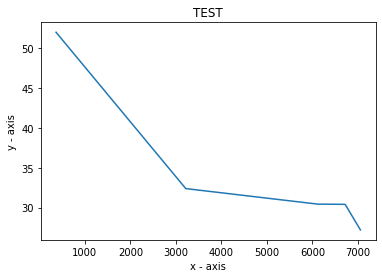

In [ ]:
x = []
y = []
for i in range(len(ans)):
  x.append(ans[i][0])
  y.append(ans[i][1])
plt.plot(x, y)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('TEST')

# function to show the plot
plt.show()
